In [4]:
import os 
import pickle
import json
import pandas as pd
import numpy as np
from utils.backtest_DL import  *
from utils.backtest import  *
from utils.optimize import *
from data.data_utils import *


##### change data type here

In [9]:
model_path={
    "rf":'Random Forest',
    'xgb':'XGB',
    'lgbm':'LGBM',
    'lstm':'LSTM',
    'cnn':'CNN',
    'cnn_lstm':'CNN_LSTM'
}

In [33]:
# resolution = '1D'

start_time=0
now_time = '2024-10-31'
symbol='VN30F1M'
                    ##### change data type here ####

model_type='rf'
data_type='min'
if  data_type =='hour':
    resolution = '1H'
elif data_type =='day':
    resolution = '1D'
else:
    resolution = '3'
data_train = pd.read_csv(f'final_{data_type}.csv')
data_train['Unnamed: 0'] = pd.to_datetime(data_train['Date'] + ' ' + data_train['time'])
data_train = data_train.drop(columns=['Date', 'time'])
data_train =  data_train.fillna(0)


new_data = get_vn30f(symbol, resolution, start_time, now_time)

===> Data VN30F1M from 1970-01-01 07:00:00 to 2024-10-30 17:00:00 has been appended 


In [34]:
### Prepare variables
                        ##### change data type & model here ####
cwd = f'{os.getcwd()}\\' + f'model\\{model_path[model_type]}\\{data_type}\\' # Save path

with open(cwd + 'top_10_list.pkl', 'rb') as f:
    selected_columns_cluster = pickle.load(f)
with open(cwd + 'top_10_features_per_cluster.pkl', 'rb') as f:
    top_10_features_per_cluster = pickle.load(f)
try:
    with open(cwd + 'best_params_list.pkl', 'rb') as f:
        best_params_list = pickle.load(f)
except:
    with open(cwd + 'best_params_list.json', 'r') as file:
        best_params_list = json.load(file)

In [35]:
cwd

'd:\\Capstone_RL\\Capstone-ML-DL\\Capstone\\model\\Random Forest\\min\\'

In [36]:
new_data.head()

,Date,Open,High,Low,Close,Volume
0,2018-08-13 09:00:00,943.5,943.6,942.9,943.5,1316
1,2018-08-13 09:03:00,943.3,943.4,942.9,943.0,839
2,2018-08-13 09:06:00,943.1,943.5,943.1,943.3,790
3,2018-08-13 09:09:00,943.2,943.3,943.1,943.2,529
4,2018-08-13 09:12:00,943.0,943.1,942.6,943.1,868


In [37]:
# Load the JSON parameter files
with open('data/momentum_params.json', 'r') as f:
    momentum_params = json.load(f)

with open('data/volume_params.json', 'r') as f:
    volume_params = json.load(f)

with open('data/volatility_params.json', 'r') as f:
    volatility_params = json.load(f)
 
with open('data/trend_params.json', 'r') as f:
    trend_params = json.load(f)

params = [momentum_params, volume_params, volatility_params, trend_params]

In [38]:
ti_features = add_features(new_data, params, data_type, False)

d:\Capstone_RL\Capstone-ML-DL\Capstone\data\data_utils.py:72: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_model = data.pivot(index = 'Date', columns = 'time', values = ['Open','High','Low','Close','Volume']).ffill(axis = 1).stack().reset_index() # Handling missing values


Applying ADX to min dataset...
Applying Aroon Indicator to min dataset...
Applying CCI to min dataset...
Applying DPO to min dataset...
Applying EMA to min dataset...
Applying SMA to min dataset...
Applying PSAR to min dataset...
Applying TRIX to min dataset...
Applying Ichimoku to min dataset...
Applying Vortex Indicator to min dataset...
Applying KST to min dataset...
Applying Mass Index to min dataset...
Applying WMA to min dataset...
Applying Accumulation/Distribution Index (ADI) to min dataset...
Applying Chaikin Money Flow (CMF) to min dataset...
Applying Ease of Movement (EoM) to min dataset...
Applying Force Index (FI) to min dataset...
Applying Money Flow Index (MFI) to min dataset...
Applying Negative Volume Index (NVI) to min dataset...
Applying On-Balance Volume (OBV) to min dataset...
Applying Volume-Price Trend (VPT) to min dataset...
Applying Volume Weighted Average Price (VWAP) to min dataset...
Applying Average True Range (ATR) to min dataset...
Applying Bollinger Band

In [39]:
financial_statements = pd.read_csv('financial_indicators.csv')
# Rename column 'period' in financial_statements to match 'quarter_label'
financial_statements = financial_statements.rename(columns={'period': 'quarter_label'})
financial_statements['quarter_label'] = financial_statements['quarter_label'].astype(str)

In [40]:
data_day_combined = add_finance_features(ti_features, financial_statements)

d:\Capstone_RL\Capstone-ML-DL\Capstone\data\data_utils.py:232: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')


In [41]:
data_day_combined =  data_day_combined.fillna(0)

data_day_combined['Unnamed: 0'] = pd.to_datetime(data_day_combined['Date'].astype(str) + ' ' + data_day_combined['time'].astype(str))
data_day_combined = data_day_combined.drop(columns=['Date', 'time'])

In [42]:
data_day_combined.to_csv('test_min.csv')

In [19]:
train_data, _ = split_data(data_train)
last_date_train =train_data['Unnamed: 0'].iloc[-1]
hold_out  = data_day_combined[data_day_combined['Unnamed: 0'] > last_date_train]


d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
hold_out

,Open,High,Low,Close,Volume,CCI_window_20,CCI_window_30,CCI_window_40,CCI_constant_0.015,DPO_window_30,...,from_sale,invest_cost,debt_to_equity_ratio,net_profit_margin,operating_margin,asset_turnover_ratio,cash_ratio,earnings_yield,roce,Unnamed: 0
2022-09-06,1287.8,1295.8,1286.9,1290.0,228845.0,38.001006,66.967114,79.065059,38.001006,-2.290000,...,2134.677617,-68.824804,5.871000,0.233670,0.639506,0.004568,0.004142,0.066098,0.071208,2022-09-06 09:00:00
2022-09-07,1283.0,1286.5,1265.0,1265.0,249186.0,-93.407549,3.671207,33.592459,-93.407549,8.373333,...,2113.437220,-68.139985,5.812582,0.231345,0.633143,0.004523,0.004101,0.065440,0.070500,2022-09-07 09:00:00
2022-09-08,1269.5,1275.5,1263.4,1264.1,295182.0,-121.670661,-19.059591,20.362532,-121.670661,19.766667,...,2092.408168,-67.461981,5.754746,0.229043,0.626843,0.004478,0.004060,0.064789,0.069798,2022-09-08 09:00:00
2022-09-09,1269.0,1275.0,1259.7,1275.0,249410.0,-105.407092,-18.913424,23.405550,-105.407092,21.933333,...,2071.588359,-66.790723,5.697486,0.226764,0.620606,0.004433,0.004019,0.064144,0.069104,2022-09-09 09:00:00
2022-09-12,1281.0,1283.2,1275.1,1276.8,153065.0,-50.026037,11.604555,42.927243,-50.026037,32.526667,...,2010.363670,-64.816759,5.529099,0.220062,0.602264,0.004302,0.003901,0.062249,0.067061,2022-09-12 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,1352.5,1354.1,1336.1,1338.0,233341.0,-137.947413,-5.324434,21.130513,-137.947413,13.770000,...,13307.643308,-169.103235,8.673338,0.393389,1.001186,0.006404,0.004443,0.090117,0.096163,2024-10-24 09:00:00
2024-10-25,1338.5,1339.8,1327.0,1327.2,225954.0,-203.095524,-58.322454,-14.532699,-203.095524,4.566667,...,13175.230045,-167.420630,8.587037,0.389475,0.991224,0.006340,0.004399,0.089221,0.095206,2024-10-25 09:00:00
2024-10-28,1330.0,1332.3,1327.2,1332.0,130396.0,-168.558552,-75.835935,-17.566651,-168.558552,-3.100000,...,12785.843151,-162.472602,8.333251,0.377964,0.961929,0.006153,0.004269,0.086584,0.092392,2024-10-28 09:00:00
2024-10-29,1334.0,1341.0,1334.0,1339.4,163921.0,-99.175077,-52.037182,5.649509,-99.175077,-7.220000,...,12658.621886,-160.855973,8.250334,0.374203,0.952357,0.006092,0.004227,0.085722,0.091473,2024-10-29 09:00:00


In [437]:
Return=[]
trades=[]
return_data = []
sharpe_list = []
volatility=[]
Sortino=[]
Calmar=[]
Win_Rate=[]
AvgTrade=[]
MDD=[]
GS=[]
feature=[]
for idx, data_item in enumerate(selected_columns_cluster):
    #Top 10 feature into list
    
    train_cols, hold_out_cols = split_data(data_item)
    temp= hold_out.drop(['Close', 'Open','High','Low','Volume', 'Return','Unnamed: 0'], axis=1)
    
    optuna_data = train_data.drop(['Open','High','Low','Close','Volume', 'Return','Unnamed: 0'], axis=1)
    X_train, X_valid, y_train, y_valid = train_test_split(optuna_data,
                                                            train_data['Return'],
                                                            test_size=0.5,
                                                            shuffle=False)
    temp= temp[X_train.columns]
    temp=scale_data(temp,X_train)
    temp= pd.concat([hold_out[[ 'Open','High','Low','Close','Volume', 'Return','Unnamed: 0']], temp], axis=1)
    temp.set_index('Unnamed: 0', inplace=True)
    temp.index.name = 'datetime'
    temp.index = pd.to_datetime(temp.index)
    selected_features = hold_out_cols.columns
    test_data=temp
    # model= joblib.load(cwd +f'best_in_cluster_{idx}.pkl')
    if model_type == 'lstm':
        model = load_model(cwd +f"best_in_cluster_{idx}.keras", compile=False)
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
        stats1= run_model_backtest_dl( test_data,selected_features,model)
    elif model_type == 'cnn_lstm' or model_type=='cnn':
        model = load_model(cwd +f"best_in_cluster_{idx}.keras", compile=False)
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        stats1= run_model_backtest_dl( test_data,selected_features,model)
    elif model_type == 'xgb':
        model = xgb.XGBRegressor()
        model.load_model(cwd + f"best_in_cluster_{idx}.json")
        stats1= run_model_backtest( test_data,selected_features,model)
        
    elif model_type == 'lgbm' or model_type=='rf':
        model= joblib.load(cwd +f'best_in_cluster_{idx}.pkl')
        stats1= run_model_backtest( test_data,selected_features,model)
   
   
    
    # print(stats1)
    stats1['_trades'].to_csv(cwd +f'trades_of_cluster_{idx}.csv')
    trades.append(stats1)
    return_data.append(stats1['Return (Ann.) [%]'])
    sharpe_test=stats1['Return (Ann.) [%]']/stats1['Volatility (Ann.) [%]']
    sharpe_list.append(float(sharpe_test))
    volatility.append(float(stats1['Volatility (Ann.) [%]']))
    Sortino.append(float(stats1['Sortino Ratio']))
    Calmar.append(float(stats1['Calmar Ratio']))
    Win_Rate.append(float(stats1['Win Rate [%]']))
    AvgTrade.append(float(stats1['Avg. Trade [%]']))
    MDD.append(float(stats1['Max. Drawdown [%]']))
    tunning = joblib.load(open(cwd + f"hypertuningcluster{idx}.pkl", "rb"))
    tunning=tunning.trials_dataframe()
    best_tunning_trial=tunning[-1:]
    sharpe_train=best_tunning_trial['values_0'].values/best_tunning_trial['values_1'].values
    sharpe_train=sharpe_train[0]
    sharpe_train
    GS.append(float(abs((sharpe_test / sharpe_train)-1)))
 
    feature.append(hold_out_cols.columns.tolist())




name=[]
for i in range(len(selected_columns_cluster)):
    name.append( 'Cluster '+ str(i))

dict = {'Top 10 Feature' : feature, 
'Best params': best_params_list,
'Best sharpe':sharpe_list,
"Return (Ann.) [%]": return_data,
'Volatility':volatility,
'Sortino Ratio':Sortino,
'Calmar Ratio':Calmar,
'Win Rate [%]':Win_Rate,
'Avg. Trade [%]':AvgTrade,
'Max. Drawdown [%]':MDD,
'Generalization Score (GS)':GS,
}
df_result = pd.DataFrame(dict)
df_result.to_csv(cwd + 'result.csv')
df_result.to_excel(cwd + 'result.xlsx', index=True, index_label='Cluster No')


d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
d:\Capstone_RL\Capstone-ML-DL\Capstone\utils\backtest.py:117: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  super().__init__(*args, cash=cash, margin=margin, **kwargs)
d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
d:\Capstone_RL\Capstone-ML-DL\Capstone\utils\backtest.py:117: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increas

In [423]:
df_result

,Top 10 Feature,Best params,Best sharpe,Return (Ann.) [%],Volatility,Sortino Ratio,Calmar Ratio,Win Rate [%],Avg. Trade [%],Max. Drawdown [%],Generalization Score (GS)
0,"[Mass Index_window_fast_9, free_cash_flow, ass...","{'n_estimators': 61, 'max_depth': 12, 'min_sam...",0.383014,21.519578,56.184790,0.568204,0.009934,43.205128,0.062097,-60.961333,3.406331
1,"[CCI_window_20, pre_tax_profit, roa, DPO_windo...","{'n_estimators': 200, 'max_depth': 14, 'min_sa...",-0.252174,-11.174257,44.311776,-0.367548,-0.014689,42.429427,0.001373,-56.722094,3.634274
2,"[DPO_window_20, roce, ADX_window_10_2, ADX_win...","{'n_estimators': 71, 'max_depth': 14, 'min_sam...",-1.028350,-40.866451,39.739837,-0.834161,-0.037787,41.958042,-0.137342,-77.073831,12.982046


# Return plot

In [388]:
Return=[]
for idx, data_item in enumerate(selected_columns_cluster):

    train_cols, hold_out_cols = split_data(data_item)

    temp= hold_out.drop(['Close', 'Open','High','Low','Volume', 'Return','Unnamed: 0'], axis=1)
    optuna_data = train_data.drop(['Open','High','Low','Close','Volume', 'Return','Unnamed: 0'], axis=1)
    X_train, X_valid, y_train, y_valid = train_test_split(optuna_data,
                                                            train_data['Return'],
                                                            test_size=0.5,
                                                            shuffle=False)
    temp= temp[X_train.columns]
    temp=scale_data(temp,X_train)
    temp= pd.concat([hold_out[[ 'Open','High','Low','Close','Volume', 'Return','Unnamed: 0']], temp], axis=1)
    temp.set_index('Unnamed: 0', inplace=True)
    temp.index.name = 'datetime'
    temp.index = pd.to_datetime(temp.index)
    selected_features = hold_out_cols.columns
    test_data=temp
    if model_type == 'lstm':
        model = load_model(cwd +f"best_in_cluster_{idx}.keras", compile=False)
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
    elif model_type == 'cnn_lstm' or model_type=='cnn':
        model = load_model(cwd +f"best_in_cluster_{idx}.keras", compile=False)
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    elif model_type == 'xgb':
        model = xgb.XGBRegressor()
        model.load_model(cwd + f"best_in_cluster_{idx}.json")
        
    elif model_type == 'lgbm' or model_type=='rf':
        model= joblib.load(cwd +f'best_in_cluster_{idx}.pkl')
        
    test_data = test_data[selected_features]
    pred = model.predict(test_data)
    Return.append(pred)

d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
d:\Capstone_RL\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


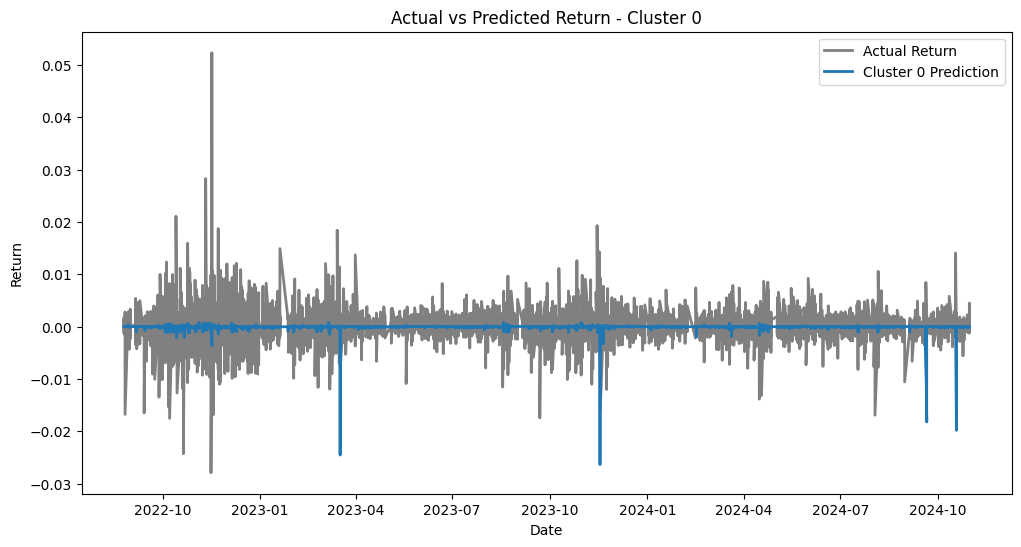

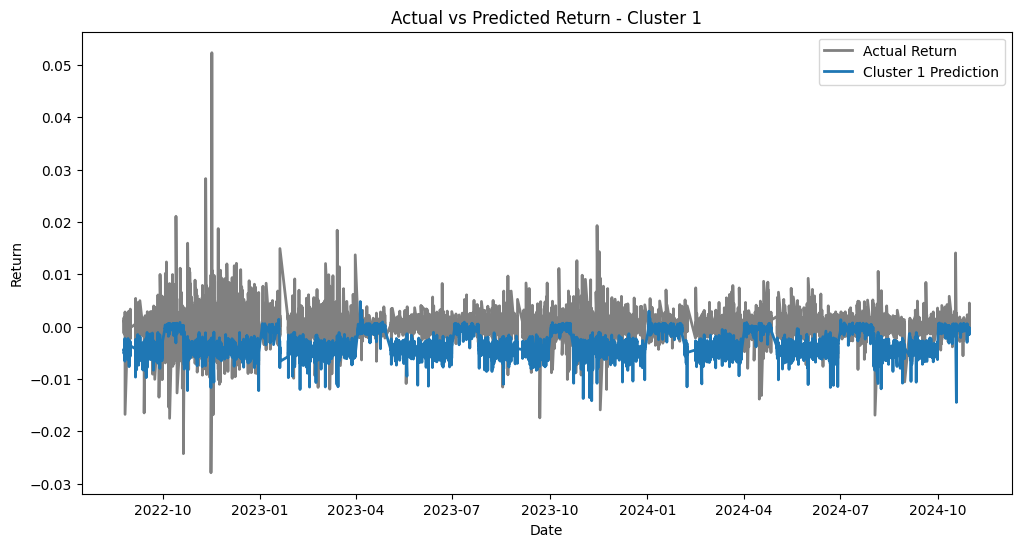

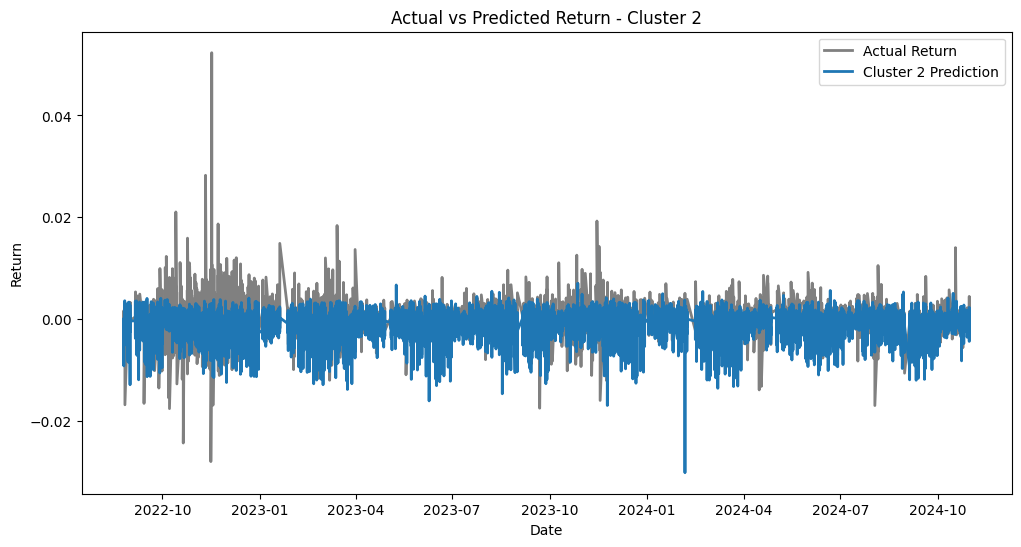

In [389]:
import matplotlib.pyplot as plt

for i, model_return in enumerate(Return):
    plt.figure(figsize=(12, 6))

    # Vẽ Return thực tế với trục x là ngày
    plt.plot(hold_out['Unnamed: 0'], hold_out['Return'], label='Actual Return', color='gray', linewidth=2)

    # Vẽ Return dự đoán của model hiện tại với trục x là ngày
    plt.plot(hold_out['Unnamed: 0'], model_return, label=f'Cluster {i} Prediction', linewidth=2)

    # Thêm tiêu đề và nhãn
    plt.title(f'Actual vs Predicted Return - Cluster {i}')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    # plt.show()
    plt.savefig(cwd +f'cluster_{i}_prediction.jpg')
    




    
